# Testing performance scores reported for the ISIC2016 dataset

In [185]:
import logging

In [186]:
from mlscorecheck.check.bundles.skinlesion import check_isic2016

In [187]:
logging.getLogger('mlscorecheck').setLevel(logging.ERROR)

In [188]:
scores = {'acc': 0.7916, 'sens': 0.2933, 'spec': 0.9145}

In [189]:
results = check_isic2016(scores=scores, eps=1e-4)
results['inconsistency']

False

## Power analysis

In [190]:
import numpy as np

In [191]:
n_experiments = 2000
all_results = []
random_state = np.random.RandomState(5)

p = 75
n = 304

for idx in range(n_experiments):
    print('.', end='')

    tp = random_state.randint(p/2, p + 1)
    tn = random_state.randint(n/2, n + 1)

    for k in [2, 3, 4]:

        acc = (np.round((tp + tn) / (n + p), k))
        sens = (np.round(tp / p, k))
        spec = (np.round(tn / n, k))

        if random_state.randint(2) == 0:
            acc += 10**(-k)
        else:
            acc -= 10**(-k)

        scores = {'acc': acc, 'sens': sens, 'spec': spec}
        results = check_isic2016(scores=scores, eps=10**(-k)/2)

        all_results.append((k, idx, results['inconsistency']))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [192]:
import pandas as pd
data = pd.DataFrame(all_results, columns=['k', 'idx', 'flag'])
results = data.groupby('k').agg({'flag': 'mean'})
import matplotlib.pyplot as plt
results.index = [2, 3, 4]

In [193]:
results

,flag
2,0.7160
3,1.0000
4,0.9915


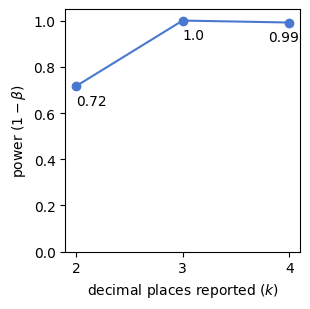

In [198]:
plt.figure(figsize=(3.2, 3.2))
plt.style.use('seaborn-v0_8-muted')
plt.plot(results.index, results['flag'])
plt.scatter(results.index, results['flag'])
ax = plt.gca()
#ax.set_xscale('log')
#ax.set_xticks(results.index, [r'${10^{-2}}/{2}$', r'${10^{-3}}/{2}$', r'${10^{-4}}/{2}$'])
ax.set_xticks([2, 3, 4], [2, 3, 4])
plt.ylim(0, 1.05)
plt.xlabel(r'decimal places reported ($k$)')
plt.ylabel(r'power ($1 - \beta$)')
#plt.grid(which='minor')
#plt.grid(which='major')
for i,j in zip(results.index[:2], results['flag'].iloc[:2]):
    ax.annotate(str(np.round(j, 2)),xy=(i,j), xytext=(i, j - 0.08))
ax.annotate(str(np.round(results['flag'].iloc[2], 2)), xy=(results.index[2], results['flag'].iloc[2]), xytext=(results.index[2]-0.20, results['flag'].iloc[2]-0.08))
plt.tight_layout()
plt.savefig('power-isic2016.eps')